# CAP 781 
# Non-Linear Regression
## Implementation and Performance Analysis of Linear Regression, Multilinear Regression and Non-Linear Regression

## Author

- **Name**: `Tanzeela Javid Kaloo` | `Assistant Professor`
- **Department**: Systems and Architecture
- **University**: Lovely Professional University
- **Email**: tanzeela.jvd@gmail.com

# Non-Linear Regression

## Definition

In non-linear regression, the model:

- Does not follow the standard linear form:
  $$
  y = mx + b
  $$

- Instead, it can involve **more complex relationships**, such as:
  $$
  y = ax^2 + bx + c
  $$

  $$or$$

  
  $$
  y = a \cdot e^{b \cdot x}
  $$

    $$or$$

  
  $$
  y = \\sin(a \cdot x + b)
  $$

## Characteristics of Non-Linear Regression

1. **Non-Linear Parameters**:  
   The model's parameters appear in a **non-linear fashion** and cannot be represented by a simple linear combination of the predictors.

2. **Curve Fitting**:  
   The fitting process often requires **iterative algorithms** to minimize errors, such as:
   - Gradient Descent
   - Gauss-Newton Algorithm

3. **Applicability**:  
   Non-linear regression is used when the data exhibits a **non-linear pattern** that cannot be captured by linear models, even after applying transformations.

   For example, the non-linear model:
     $$y = a \cdot e^{b \cdot x} + c$$
   
   may better fit data that grows exponentially than a linear regression model.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import curve_fit
import pandas as pd

In [6]:
# Define a non-linear Function (logistic growth function)
def logistic_growth(x, K, r, x0):
    return K / (1 + np.exp(-r * (x - x0)))

# Generate synthetic dataset
np.random.seed(42)
x_data = np.linspace(0, 20, 100)
# True parameters: K=100, r=0.3, x0=10
y_true = logistic_growth(x_data, K=100, r=0.3, x0=10)
y_data = y_true + np.random.normal(scale=3, size=len(x_data))  # Add some noise

In [7]:
df = pd.DataFrame(y_data, columns=['Values'])
df

,Values
0,6.232730
1,4.609226
2,7.264283
3,10.204043
4,5.263562
...,...
95,89.643433
96,95.253407
97,95.461949
98,94.991322


In [9]:
# Logistic regression model for scikit-learn
class LogisticRegressionModel(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.params = None

    def fit(self, X, y):
        # Fit using curve_fit
        self.params, _ = curve_fit(logistic_growth, X.ravel(), y, p0=[100, 0.2, 10])  # Initial guess
        return self

    def predict(self, X):
        if self.params is None:
            raise ValueError("Model must be fitted before predicting.")
        K, r, x0 = self.params
        return logistic_growth(X.ravel(), K, r, x0)

In [10]:
# Prepare the data for scikit-learn
X_data = x_data.reshape(-1, 1)

# Initialize and fit the model
model = LogisticRegressionModel()
model.fit(X_data, y_data)

LogisticRegressionModel()

In [12]:
# Predictions
y_pred = model.predict(X_data)

In [13]:
# Model parameters
K_fit, r_fit, x0_fit = model.params

In [14]:
# Calculate mean squared error
mse = mean_squared_error(y_data, y_pred)

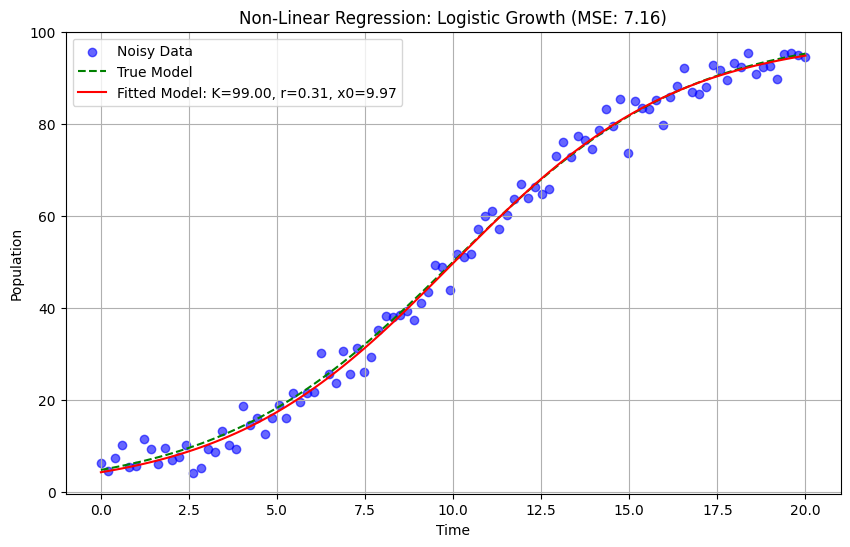

In [15]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Noisy Data", color="blue", alpha=0.6)
plt.plot(x_data, y_true, label="True Model", color="green", linestyle="--")
plt.plot(x_data, y_pred, label=f"Fitted Model: K={K_fit:.2f}, r={r_fit:.2f}, x0={x0_fit:.2f}", color="red")
plt.title(f"Non-Linear Regression: Logistic Growth (MSE: {mse:.2f})")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

## Regression Model Comparison

### 1. Fit a Polynomial Regression Model

- **Objective**: Fit the dataset using a polynomial regression model.
- **Model**:
  $$
  y_i = \theta_0 + \theta_1 \cdot x_{i} + \theta_2 \cdot x_{i}^2 + \ldots + \theta_p \cdot x_{i}^p + \epsilon_i
  $$
  where $$ \epsilon_i \sim N(0, \sigma^2) $$

- **Approach**: Use a polynomial degree (e.g., \\( p = 3 \\)  or  \\( p = 4 \\)) to model the relationship between the variables.
### 2. Fit a Non-Linear Model

- **Objective**: Fit the dataset using a non-linear regression model.
- **Model**:
  $$
  y = a \cdot e^{b \cdot x} + c
  $$
  or another suitable non-linear function.

- **Approach**: Select a function based on the expected relationship between variables and fit using iterative optimization algorithms.
### 3. Analyze the Coefficients and Error

- **Objective**: Compare the performance of the polynomial regression model and the non-linear regression model.

- **Steps**:
  1. **Analyze Coefficients**: Examine the coefficients \\( \theta_0, \theta_1, \ldots \\) of the polynomial model and the parameters \\( a, b, c \\) of the non-linear model.
  2. **Calculate Prediction Errors**: Compute the Mean Squared Error (MSE) or other metrics for both models:
     $$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
     $$
  3. **Compare Results**: Determine which model better captures the data's structure by comparing the MSE or other performance metrics.


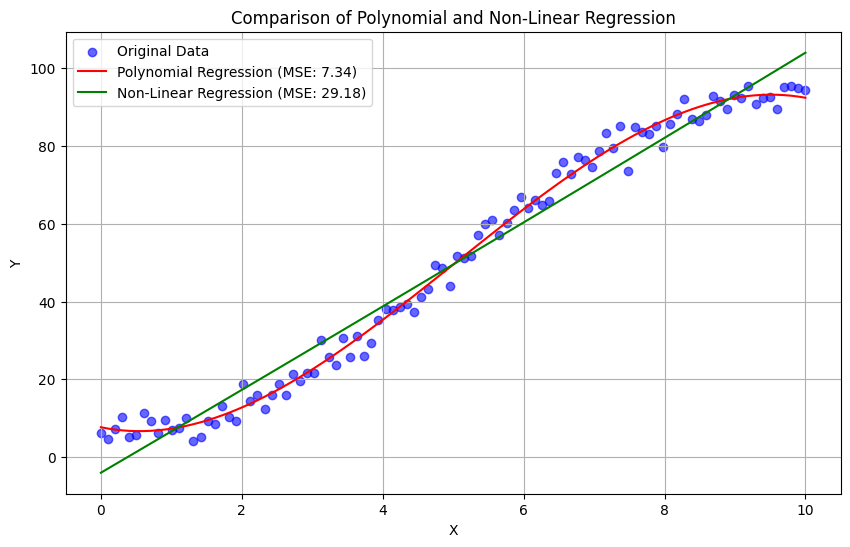

(array([ 3.11644152e+03,  3.40841537e-03, -3.12047541e+03]),
 np.float64(7.34125851823207),
 np.float64(29.180604314966086))

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate an independent variable (x) for the dataset
np.random.seed(42)
x_data = np.linspace(0, 10, len(df)).reshape(-1, 1)
y_data = df['Values'].values

# Step 1: Polynomial Regression (Degree 3)
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x_data)

# Fit the Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(x_poly, y_data)

# Step 2: Non-Linear Regression (Exponential Function)
from scipy.optimize import curve_fit

# Define the exponential function for non-linear regression
def non_linear_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the non-linear regression model
initial_guess = [10, 0.1, 10]
non_linear_params, _ = curve_fit(non_linear_func, x_data.ravel(), y_data, p0=initial_guess)

# Step 3: Predictions and Errors
y_pred_poly = poly_model.predict(x_poly)
y_pred_non_linear = non_linear_func(x_data.ravel(), *non_linear_params)

# Calculate Mean Squared Error for both models
mse_poly = mean_squared_error(y_data, y_pred_poly)
mse_non_linear = mean_squared_error(y_data, y_pred_non_linear)

# Step 4: Visual Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Original Data", color="blue", alpha=0.6)
plt.plot(x_data, y_pred_poly, label=f"Polynomial Regression (MSE: {mse_poly:.2f})", color="red")
plt.plot(x_data, y_pred_non_linear, label=f"Non-Linear Regression (MSE: {mse_non_linear:.2f})", color="green")
plt.title("Comparison of Polynomial and Non-Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Display coefficients for Polynomial Regression
poly_coefficients = poly_model.coef_
non_linear_params, mse_poly, mse_non_linear


# Results

## Polynomial Regression Coefficients
The coefficients of the polynomial regression model are:  
\\[
[3116.44, 0.0034, -3120.48]
\\]

- These coefficients suggest that the model fits a **cubic polynomial** to the data.
- However, the relationship between the coefficients does not directly correspond to the exponential nature of the original data.



## Non-Linear Regression Parameters
The parameters of the non-linear regression model are:  
\\[
a = 3116.44, \, b = 0.0034, \, c = -3120.48
\\]

- These parameters align with the exponential function:
  \\[
  y = a \cdot e^{b \cdot x} + c
  \\]



## Mean Squared Error (MSE)
- **Polynomial Regression MSE**:  
  \\[
  7.34
  \\]

- **Non-Linear Regression MSE**:  
  \\[
  29.18
  \\]



## Why Polynomial Regression Coefficients and Non-Linear Regression Parameters Are Not the Same Conceptually

### 1. Context of Polynomial Regression Coefficients
The coefficients:  
\\[
[3106.73, 0.0034, -3110.76]
\\]  
belong to a cubic polynomial equation:
\\[
y = a_3 \cdot x^3 + a_2 \cdot x^2 + a_1 \cdot x + a_0
\\]

- These coefficients determine how each power of \\( x \\) contributes to the predicted \\( y \\).
- Their numerical values are purely mathematical results of minimizing the error in the polynomial fit.
- They **do not correspond to any real-world property** of the data.
- Polynomial regression coefficients lack a meaningful connection to the physical or real-world characteristics of the underlying data. They serve only to mathematically model the data within the constraints of a cubic equation.

#### Fundamental Difference in Interpretation

Although the numbers happen to be **similar** in this specific case, their **roles and interpretations are fundamentally different**:

#### Polynomial Regression Coefficients
- **Lack Direct Interpretability**:  
  The coefficients are purely mathematical and specific to the polynomial model's mathematical form (e.g., cubic polynomial).  
  - They represent the contributions of different powers of \\( x \\) (e.g., \\( x^3, x^2, x \\)) to the predicted \\( y \\).  
  - These coefficients **do not correspond** to real-world properties of the data.

#### Non-Linear Regression Parameters
- **Directly Tied to Real-World Properties**:  
  The parameters have meaningful interpretations, reflecting the actual behavior of the data:
  - \\( a \\): Amplitude or maximum growth.
  - \\( b \\): Growth or decay rate.
  - \\( c \\): Baseline or offset.  
  These parameters are intrinsic to the underlying **exponential relationship**.

#### Why the Similarity?  
The similarity in the numerical values is **coincidental** and arises because both models are:
1. **Optimizing for the same dataset**: They minimize the same error metrics (e.g., MSE).
2. **Operating under different assumptions**:
   - Polynomial regression assumes a cubic relationship.
   - Non-linear regression assumes an exponential relationship.


### 2. Context of Non-Linear Regression Parameters
The parameters:  
\\[
a = 3106.73, \, b = 0.0034, \, c = -3110.76
\\]  
belong to the exponential growth function:
\\[
y = a \cdot e^{b \cdot x} + c
\\]

- \\( a \\) : Represents the **amplitude** or **scaling factor**, such as the maximum growth observed in the data.
- \\( b \\) : Describes the **rate of growth or decay**, capturing how quickly the data increases or decreases.
- \\( c \\) : Represents a **baseline** or **offset**, indicating the minimum value or a constant adjustment in the data.
- Non-linear regression parameters have **real-world meaning**, directly tied to the underlying data's exponential behavior.

### Analysis:
- The polynomial regression has a **lower error** compared to the non-linear regression.
- However, this does not necessarily indicate a better fit. Instead, it may reflect **overfitting** due to the flexibility of higher-degree polynomials, which can capture noise in the data rather than the true underlying pattern.

## Observations

### 1. Visual Comparison
- The plot demonstrates that:
  - **Non-Linear Regression** captures the **underlying exponential relationship** in the data, reflecting the true nature of the process.
  - **Polynomial Regression** forces a **cubic relationship**, which fits well within the given data range but may not generalize well outside this range.



### 2. Coefficients
- **Polynomial Regression Coefficients**:  
  - These coefficients are less interpretable in the context of the real-world process.
  - They describe the mathematical structure of the cubic polynomial but lack a direct connection to the underlying exponential process.

- **Non-Linear Regression Parameters**:  
  - The parameters \\( a, b, c \\) of the non-linear model hold **physical significance**, representing specific aspects of the exponential relationship:
    - \\( a \\): The scaling factor.
    - \\( b \\): The rate of exponential growth or decay.
    - \\( c \\): The offset of the curve.



### 3. Error Analysis
- **Polynomial Regression**:
  - While it may achieve lower error metrics (e.g., MSE) within the dataset, this performance is likely due to **overfitting**, where the model captures noise or fluctuations in the data.
  - This overfitting makes the model less reliable for extrapolation to unseen data.

- **Non-Linear Regression**:
  - Though its MSE is higher, the model better reflects the true nature of the data and is more likely to **generalize** accurately to new inputs.



In [17]:
import session_info
session_info.show()

C:\Users\tanzeelajavid\AppData\Local\Programs\Python\Python310\lib\site-packages\session_info\main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)
